# **Recommendation System**

## Business Understanding

### Problem Statements

Menjelaskan pernyataan masalah:
- Bagaimana memberikan rekomendasi game yang relevan berdasarkan deskripsi konten game?
- Bagaimana meningkatkan akurasi rekomendasi menggunakan pendekatan content-based filtering?

### Goals

Menjelaskan tujuan proyek yang menjawab pernyataan masalah:
- Membangun sistem rekomendasi berbasis content-based filtering menggunakan TF-IDF dan cosine similarity.
- Memberikan 10 rekomendasi game paling relevan berdasarkan input judul game.

### Solution Statements

- Menggunakan metode TF-IDF untuk ekstraksi fitur dari deskripsi teks.
- Menggunakan cosine similarity untuk mengukur kemiripan antar game berdasarkan vektor TF-IDF.
- Menyimpan hasil perhitungan similarity untuk menghasilkan top-N recommendation.

- Import Library

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from wordcloud import  WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import  cosine_similarity


## Data Understanding

Dataset yang digunakan diambil dari Kaggle - Steam Store Games
Tautan Dataset:<br>
Steam Store Games : https://www.kaggle.com/datasets/nikdavis/steam-store-games <br>

Dataset ini memiliki 27.075 baris dan 18 kolom data yang mempresentasikan

- appid : Id unik dari game
- name : Nama dari game
- release_date : Tanggal liris dari game
- english : Menandakan apakah game tersebut support bahasa inggris
- developer : Developer game
- publisher : Publisher game
- platforms : Platform yang support untuk memainkan game
- required_age : Batas umur untuk memainkan game
- categories : Kategore dari game seperti Multiplayer, Singleplayer, VR, dll
- genres : Genre dari game (Action, Indie, RPG, dll)
- steamspy_tags : Tag yang diberikan pengguna
- achievements : 
- positive_ratings : Rating Positive dari game
- negative_ratings : Rating Negative dari game
- average_playtime : Rata rata playtime dari game
- median_playtime : Nilai tengah atau Median dari playtime game
- owners : User yang memilki game
- price : Harga dari game dalam bentuk USD

Kondisi Data :<br>
- Missing Values : Dilakukan pada Exploration Data Analytics yakni terdapat missing values kolom developer (1) dan publisher (14)
- Duplicate Data : Dilakukan pada Exploration Data Analytics yakni tidak terdapat duplikat data
- Outlier : Dilakukan pada Exploration Data Analytics terlihat terdapat outlier di kolom :
    - Kolom price : 1975 Outlier
    - Kolom positive_ratings : 4286 Outlier
    - Kolom negative_ratings : 3957 Outlier
    - Kolom required_age : 596 Outlier
    - Kolom achievements : 1695 Outlier 

- Load Data

In [2]:
df = pd.read_csv('../data/steam.csv')

## Exploration Data Analysis

1. Pemeriksaan Struktur Data, Missing Values dan Duplicate Data : <br>
Dataset terdiri dari 27.075 baris dengan berbagai variabel seperti appid, name, release_date, english, developer, publisher, platforms, required_age, categories, genres, steamspy_tags, achievements, positive ratings, negtive ratings, average playtime, median playtime, owners, price. Hasil pengecekan menunjukkan bahwa terdapat missing values pada dataset tepatnya di kolom developer dan publisher

In [3]:
df.head()

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99


In [4]:
df.dtypes

appid                 int64
name                 object
release_date         object
english               int64
developer            object
publisher            object
platforms            object
required_age          int64
categories           object
genres               object
steamspy_tags        object
achievements          int64
positive_ratings      int64
negative_ratings      int64
average_playtime      int64
median_playtime       int64
owners               object
price               float64
dtype: object

In [5]:
df.isna().sum()

appid                0
name                 0
release_date         0
english              0
developer            1
publisher           14
platforms            0
required_age         0
categories           0
genres               0
steamspy_tags        0
achievements         0
positive_ratings     0
negative_ratings     0
average_playtime     0
median_playtime      0
owners               0
price                0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

2. Statistik Deskriptif : <br>


In [7]:
df.describe()

,appid,english,required_age,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,price
count,2.707500e+04,27075.000000,27075.000000,27075.000000,2.707500e+04,27075.000000,27075.000000,27075.00000,27075.000000
mean,5.962035e+05,0.981127,0.354903,45.248864,1.000559e+03,211.027147,149.804949,146.05603,6.078193
std,2.508942e+05,0.136081,2.406044,352.670281,1.898872e+04,4284.938531,1827.038141,2353.88008,7.874922
min,1.000000e+01,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.00000,0.000000
25%,4.012300e+05,1.000000,0.000000,0.000000,6.000000e+00,2.000000,0.000000,0.00000,1.690000
50%,5.990700e+05,1.000000,0.000000,7.000000,2.400000e+01,9.000000,0.000000,0.00000,3.990000
75%,7.987600e+05,1.000000,0.000000,23.000000,1.260000e+02,42.000000,0.000000,0.00000,7.190000
max,1.069460e+06,1.000000,18.000000,9821.000000,2.644404e+06,487076.000000,190625.000000,190625.00000,421.990000


3. Cek Outlier

In [8]:
numeric = df[['price', 'positive_ratings', 
              'negative_ratings','required_age', 'achievements']]
def check_outlier(data):
    Q1 = df[data].quantile(0.25)
    Q3 = df[data].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outlier = df[(df[data] < lower) | (df[data]>upper)]
    print(f"Kolom {data} : {len(outlier)} Outlier")
for i in numeric:
    check_outlier(i)

Kolom price : 1975 Outlier
Kolom positive_ratings : 4286 Outlier
Kolom negative_ratings : 3957 Outlier
Kolom required_age : 596 Outlier
Kolom achievements : 1695 Outlier


4. Visual

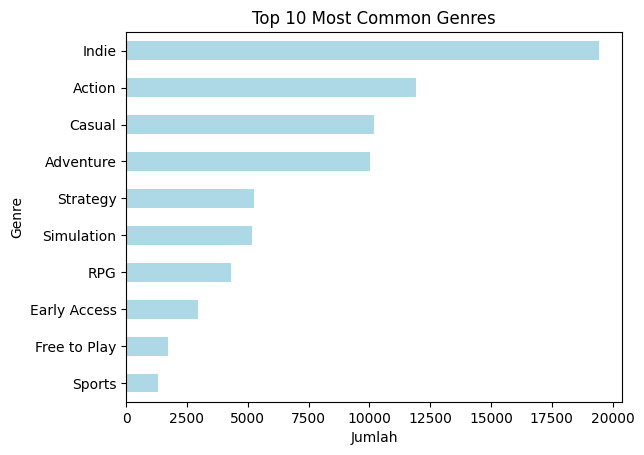

In [9]:
df['genres'].str.split(';').explode().value_counts().head(10).plot(kind='barh', color='lightblue')
plt.title("Top 10 Most Common Genres")
plt.xlabel("Jumlah")
plt.ylabel("Genre")
plt.gca().invert_yaxis()
plt.show()

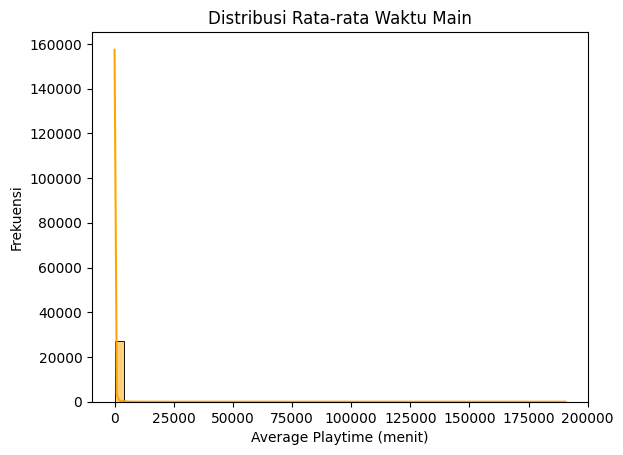

In [10]:
sns.histplot(df['average_playtime'], bins=50, kde=True, color='orange')
plt.title("Distribusi Rata-rata Waktu Main")
plt.xlabel("Average Playtime (menit)")
plt.ylabel("Frekuensi")
plt.show()

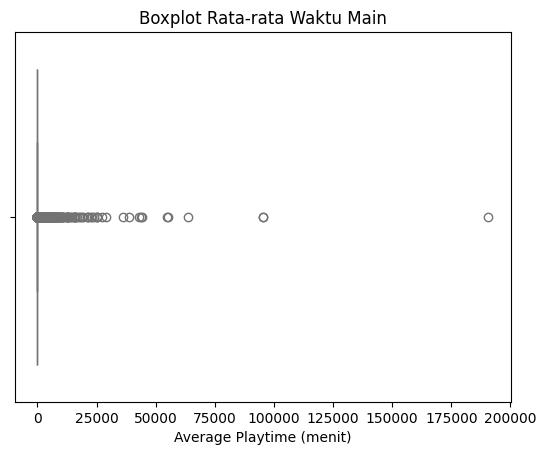

In [11]:
sns.boxplot(x=df['average_playtime'], color='lightgreen')
plt.title("Boxplot Rata-rata Waktu Main")
plt.xlabel("Average Playtime (menit)")
plt.show()

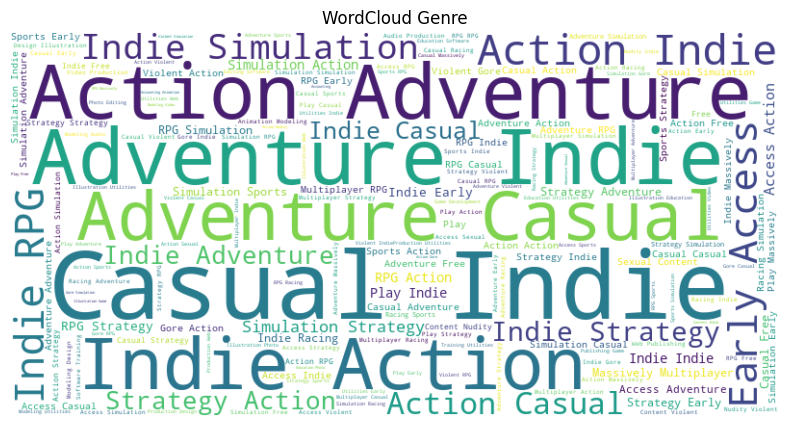

In [12]:
text = ' '.join(df['genres'].dropna().str.replace(';', ' '))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud Genre")
plt.show()


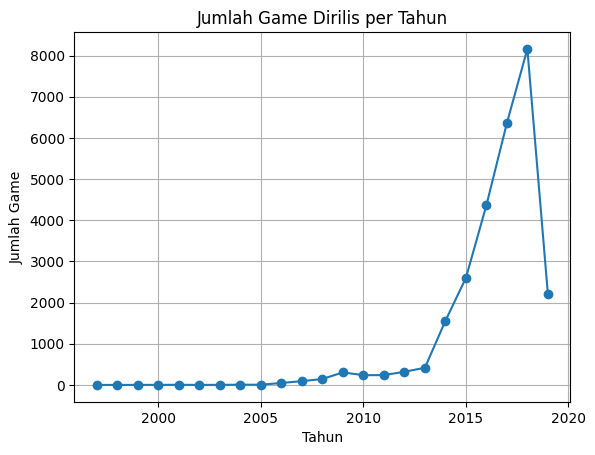

In [13]:
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df['release_year'] = df['release_date'].dt.year

df['release_year'].value_counts().sort_index().plot(kind='line', marker='o')
plt.title("Jumlah Game Dirilis per Tahun")
plt.xlabel("Tahun")
plt.ylabel("Jumlah Game")
plt.grid(True)
plt.show()


## Data Preparation

1. Handling Missing Values

In [14]:
df = df.dropna()

In [15]:
df = df.drop(columns=['appid'], axis=1)
df['required_age'] = df['required_age'].astype(float)
df['achievements'] = df['achievements'].astype(float)
df['positive_ratings'] = df['positive_ratings'].astype(float)
df['negative_ratings'] = df['negative_ratings'].astype(float)
df['average_playtime'] = df['average_playtime'].astype(float)
df['median_playtime'] = df['median_playtime'].astype(float)
df['price'] = df['price'].astype(float)
df['combined'] = df['genres'].fillna('') + ' ' + df['developer'].fillna('')

3. Handling Outlier

In [16]:
numeric = df[['price', 'positive_ratings', 
              'negative_ratings', 'required_age', 'achievements']]
def outlier_handling(data):
    Q1 = df[data].quantile(0.25)
    Q3 = df[data].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df.loc[df[data] > upper, data] = upper
    df.loc[df[data] < lower, data] = lower

for i in numeric:
    outlier_handling(i)
    check_outlier(i)

Kolom price : 0 Outlier
Kolom positive_ratings : 0 Outlier
Kolom negative_ratings : 0 Outlier
Kolom required_age : 0 Outlier
Kolom achievements : 0 Outlier


4. Vecotrization

In [ ]:
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['combined'])
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

## Modelling

In [18]:
def get_recommendations(name, cosine_sim=cosine_sim):
    idx = df[df['name'].str.lower() == name.lower()].index
    if len(idx) == 0:
        return f"Game '{name}' tidak ditemukan di dataset."
    idx = idx[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    game_indices = [i[0] for i in sim_scores]
    return df[['name', 'genres', 'developer']].iloc[game_indices]

## Evaluation

In [19]:
get_recommendations("Grand Theft Auto V")

,name,genres,developer
291,Manhunt,Action,Rockstar North
294,Grand Theft Auto,Action,Rockstar North
295,Grand Theft Auto 2,Action,Rockstar North
297,Grand Theft Auto IV,Action;Adventure,Rockstar North;Rockstar Toronto
298,Grand Theft Auto: Episodes from Liberty City,Action,Rockstar North / Toronto
288,Grand Theft Auto III,Action,Rockstar Games
289,Grand Theft Auto: Vice City,Action,Rockstar Games
290,Grand Theft Auto: San Andreas,Action,Rockstar Games
1230,Max Payne 3,Action,Rockstar Studios
17643,L.A. Noire: The VR Case Files,Violent;Action;Adventure,Rockstar Games
